<a href="https://colab.research.google.com/github/Sereshakash/Bin-Search-Tree/blob/master/bdz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import seaborn as sns

from statsmodels.stats.weightstats import ztest

In [ ]:
#df = pd.read_excel('/content/data_matstat_K5.xls', sheet_name = 3)
#df

In [ ]:
from google.colab import files
upload = files.upload()

Saving data_matstat_K5.xls to data_matstat_K5.xls


In [ ]:
df = pd.read_excel(open("data_matstat_K5.xls", "rb"), 3)

In [ ]:
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [ ]:
m1 = df.C6
m1

0      1298.8
1      1032.5
2      2372.3
3      2449.5
4      1952.1
        ...  
310    2263.6
311    1841.1
312    1125.6
313    2729.6
314    1627.0
Name: C6, Length: 315, dtype: float64

In [ ]:
df.describe()

,C1,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,50.146032,26.157374,1796.654603,77.033333,12.788571,3.279365,242.460635,2185.603175,832.714286,189.892063,602.790476
std,14.575226,6.013550,680.347435,33.829443,5.330192,12.322880,131.991614,1473.886547,589.289030,183.000803,208.895474
min,19.000000,16.331140,445.200000,14.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000,179.000000
25%,39.000000,21.799715,1338.000000,53.950000,9.150000,0.000000,155.000000,1116.000000,480.000000,90.000000,466.000000
50%,48.000000,24.735250,1666.800000,72.900000,12.100000,0.300000,206.300000,1802.000000,707.000000,140.000000,566.000000
75%,62.500000,28.853415,2100.450000,95.250000,15.600000,3.200000,308.850000,2836.000000,1037.000000,230.000000,716.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1415.000000,1727.000000


1.1. Выборочные характеристики

In [ ]:
df1 = df[['C8', 'C10', 'C13']]
df1

,C8,C10,C13
0,6.3,170.3,200
1,15.8,75.8,124
2,19.1,257.9,328
3,26.5,332.6,153
4,16.2,170.8,92
...,...,...,...
310,19.4,306.5,164
311,14.1,257.7,80
312,11.9,150.5,300
313,13.2,381.8,121


In [ ]:
df1.mean()

C8      12.788571
C10    242.460635
C13    189.892063
dtype: float64

In [ ]:
df1.var()

C8        28.410952
C10    17421.786152
C13    33489.294045
dtype: float64

In [ ]:
df1.std()

C8       5.330192
C10    131.991614
C13    183.000803
dtype: float64

In [ ]:
#Выборочный коэффициент асимметрии
df1.skew()

C8     1.152933
C10    1.480055
C13    3.564155
dtype: float64

In [ ]:
#Выборочный эксцесс
df1.kurt()

C8      2.483521
C10     3.412585
C13    17.209008
dtype: float64

1.2. Группировка и гистограммы частот

In [ ]:
C_8 = df.C8

In [ ]:
C_8

0       6.3
1      15.8
2      19.1
3      26.5
4      16.2
       ... 
310    19.4
311    14.1
312    11.9
313    13.2
314     9.9
Name: C8, Length: 315, dtype: float64

In [ ]:
n = len(C_8)
n

315

In [ ]:
#Формула Стерджесса
num = int(1 + math.log2(n))
num

9

In [ ]:
C_8.max()

36.8

In [ ]:
(C_8.max() - C_8.min()) / num

1.872222222222222

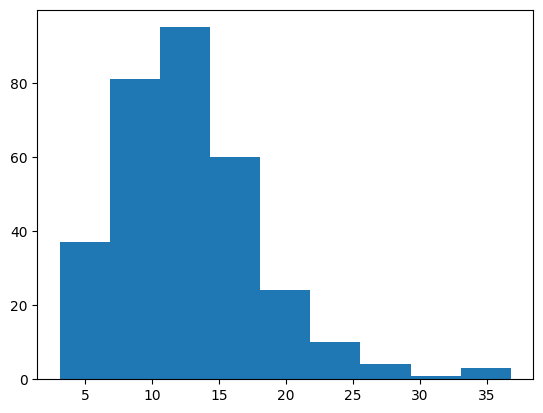

In [ ]:
count_in_bin, interval, patches = plt.hist(C_8, bins=num)

In [ ]:
count1 = []
count2 = []
count3 = []
count4 = []
middle = []
for i in range(num):
  count1.append(count_in_bin[i])
  middle.append((interval[i] + interval[i + 1]) / 2)
  print("Номер интервала {}, кол-во {}, интервал {}:{}".format(i + 1, int(count_in_bin[i]), interval[i], interval[i + 1]))

Номер интервала 1, кол-во 37, интервал 3.1:6.844444444444444
Номер интервала 2, кол-во 81, интервал 6.844444444444444:10.588888888888889
Номер интервала 3, кол-во 95, интервал 10.588888888888889:14.333333333333332
Номер интервала 4, кол-во 60, интервал 14.333333333333332:18.077777777777776
Номер интервала 5, кол-во 24, интервал 18.077777777777776:21.822222222222223
Номер интервала 6, кол-во 10, интервал 21.822222222222223:25.566666666666666
Номер интервала 7, кол-во 4, интервал 25.566666666666666:29.31111111111111
Номер интервала 8, кол-во 1, интервал 29.31111111111111:33.05555555555555
Номер интервала 9, кол-во 3, интервал 33.05555555555555:36.8


In [ ]:
sum_rel_frequency = 0
sum_frequency = 0
for i in range(num):
  rel_frequency = count_in_bin[i] / n
  sum_frequency += int(count_in_bin[i])
  sum_rel_frequency += rel_frequency
  count2.append(rel_frequency)
  count3.append(sum_frequency)
  count4.append(sum_rel_frequency)
  print("Номер интервала {}, частота {}, отн частота {}, накопл {}, отн накопл {}".format(i + 1, int(count_in_bin[i]), rel_frequency, sum_frequency, sum_rel_frequency))

Номер интервала 1, частота 37, отн частота 0.11746031746031746, накопл 37, отн накопл 0.11746031746031746
Номер интервала 2, частота 81, отн частота 0.2571428571428571, накопл 118, отн накопл 0.3746031746031746
Номер интервала 3, частота 95, отн частота 0.30158730158730157, накопл 213, отн накопл 0.6761904761904762
Номер интервала 4, частота 60, отн частота 0.19047619047619047, накопл 273, отн накопл 0.8666666666666667
Номер интервала 5, частота 24, отн частота 0.0761904761904762, накопл 297, отн накопл 0.9428571428571428
Номер интервала 6, частота 10, отн частота 0.031746031746031744, накопл 307, отн накопл 0.9746031746031746
Номер интервала 7, частота 4, отн частота 0.012698412698412698, накопл 311, отн накопл 0.9873015873015872
Номер интервала 8, частота 1, отн частота 0.0031746031746031746, накопл 312, отн накопл 0.9904761904761904
Номер интервала 9, частота 3, отн частота 0.009523809523809525, накопл 315, отн накопл 0.9999999999999999


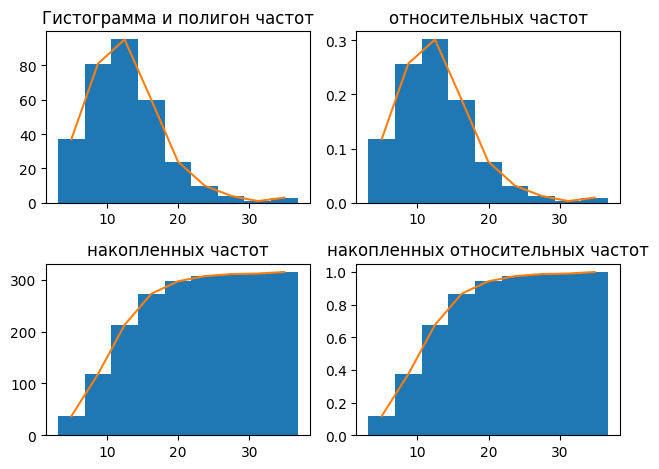

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(C_8, bins=num)
axs[0, 0].plot(middle, count1)
axs[0, 0].set_title('Гистограмма и полигон частот')

axs[0, 1].hist(C_8, bins=num, weights = np.array([1] * n) / n)
axs[0, 1].plot(middle, count2)
axs[0, 1].set_title('относительных частот')

axs[1, 0].hist(C_8, bins=num, cumulative=True)
axs[1, 0].plot(middle, count3)
axs[1, 0].set_title('накопленных частот')

axs[1, 1].hist(C_8, bins=num,  cumulative=True, weights = np.array([1] * n) / n)
axs[1, 1].plot(middle, count4)
axs[1, 1].set_title('накопленных относительных частот')

fig.tight_layout()
plt.show()

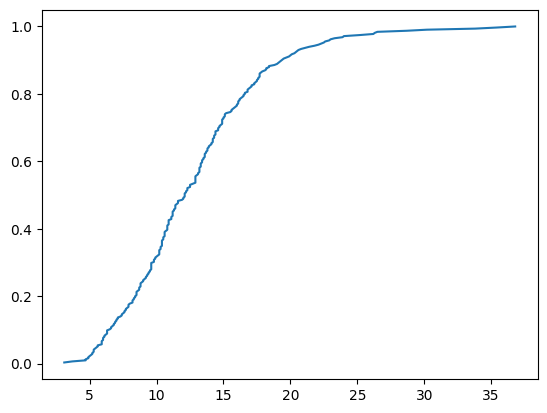

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(C_8)
plt.plot(ecdf.x, ecdf.y)
plt.show()

Задание 2


2.1. Доверительные интервалы для мат. ожидания

In [ ]:
alpha = [0.001, 0.05, 0.1]
for al in alpha:
  diff = (C_8.std() / n ** 0.5) * st.t.ppf(1 - al / 2, n - 1)
  print(str(al) + ": {} - {}".format(C_8.mean() - diff, C_8.mean() + diff))

0.001: 11.790966768895881 - 13.786176088246975
0.05: 12.197672933255406 - 13.37946992388745
0.1: 12.293123436292687 - 13.28401942085017


2.2. Доверительные интервалы для дисперсии

In [ ]:
S_sq = C_8.var()
for al in alpha:
  lower = (n - 1) * S_sq / (st.chi2.ppf(1 - al / 2, n - 1))
  higher = (n - 1) * S_sq / (st.chi2.ppf(al / 2, n - 1))
  print(str(al) + ": {} - {}".format(lower,higher))

0.001: 22.133182656095343 - 37.47883190305683
0.05: 24.44236888053388 - 33.43663914368317
0.1: 25.036224593292605 - 32.56471282010102


2.3. Доверительные интервалы для разности мат. ожиданий

In [ ]:
C_11 = df.C11
C_12 = df.C12

In [ ]:
S1_sq = C_11.var()
S2_sq = C_12.var()
m1 = C_11.mean()
m2 = C_12.mean()
print(S1_sq, S2_sq, m1, m2)

2172341.552219189 347261.5614194723 2185.6031746031745 832.7142857142857


In [ ]:
#Тк n = n1 = n2
k = ((S1_sq / (S1_sq + S2_sq)) ** 2 + (S1_sq / (S1_sq + S2_sq)) ** 2) / (n - 1)
int(1 / k)

211

In [ ]:
for al in alpha:
  diff = ((S1_sq + S2_sq) / n) ** 0.5 * st.t(int(1 / k)).ppf(1 - al / 2)
  print(str(al) + ": {} - {}".format(m1 - m2 - diff, m1 - m2 + diff))

0.01: 1120.4160352841755 - 1585.361742493602
0.05: 1176.5869671638345 - 1529.1908106139429
0.1: 1205.131557834346 - 1500.6462199434313


2.4. Доверительные интервалы для отношения дисперсий

In [ ]:
for al in alpha:
  lower = S1_sq / S2_sq * st.f(n-1, n-1).ppf(al/2)
  higher = S1_sq / S2_sq * st.f(n-1, n-1).ppf(1 - al/2)
  print(str(al) + ": {} - {}".format(lower,higher))

0.001: 4.309089727068848 - 9.08149303246911
0.05: 5.012156001879108 - 7.807611797794926
0.1: 5.1942503627360965 - 7.533901063645782


In [ ]:
C_11.var() / C_12.var()

6.255634926421135

3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

3.1. Проверка статистических гипотез о математических ожиданиях


In [ ]:
C_8.mean()

12.788571428571428

In [ ]:
alpha = 0.1
m_0_all = [5, 13, 20]

In [ ]:
for m_0 in m_0_all:
  z, p_value = st.ttest_1samp(C_8, m_0)
  print("m0 = " + str(m_0) + ": z = {}; p_value = {}".format(z, p_value))

m0 = 5: z = 25.93404096834318; p_value = 4.734224669651326e-80
m0 = 13: z = -0.7040055141809971; p_value = 0.48195108875374726
m0 = 20: z = -24.01229618638965; p_value = 4.6269968879023174e-73


3.2. Проверка статистических гипотез о дисперсиях


In [ ]:
C_8.std()

5.3301924706656045

In [ ]:
alpha = 0.1
std_0_all = [2, 5, 20]

In [ ]:
for std_0 in std_0_all:
  z = (n - 1) * C_8.var() / (std_0 ** 2)
 # pstats.chi2.cdf(z, df=len(x)-1)
  f = st.chi2.cdf(z, n - 1)
  p_value = 2 * min(f, 1 - f)
  print("std_0 = " + str(std_0) + ": z = {}; p_value = {}".format(z, p_value))


std_0 = 2: z = 2230.259714285714; p_value = 0.0
std_0 = 5: z = 356.8415542857142; p_value = 0.09615501345043964
std_0 = 20: z = 22.302597142857138; p_value = 7.09033055384648e-119


3.3. Проверка статистических гипотез о равенстве математических ожиданий

In [ ]:
C_11.mean(), C_12.mean()

(2185.6031746031745, 832.7142857142857)

In [ ]:
st.ttest_ind(C_11, C_12, equal_var=False)

TtestResult(statistic=15.126948860992421, pvalue=1.9889110595721522e-41, df=411.8880680150302)

3.4. Проверка статистических гипотез о равенстве дисперсий

In [ ]:
C_11.std(), C_12.std()

(1473.8865465900653, 589.2890304591392)

In [ ]:
z = S1_sq / S2_sq
f = st.f(n - 1, n - 1).cdf(z)
p_value = 2 * min(f, 1 - f)
print("z = {}; p_value = {}".format(z, p_value))

z = 6.255634926421135; p_value = 2.220446049250313e-16


4. Критерии согласия

4.1. Критерий хи-квадрат


In [ ]:
#Формула Стерджесса
num = int(1 + math.log2(n))
num

9

In [ ]:
C_8.max()

36.8

In [ ]:
(C_8.max() - C_8.min()) / num

3.744444444444444

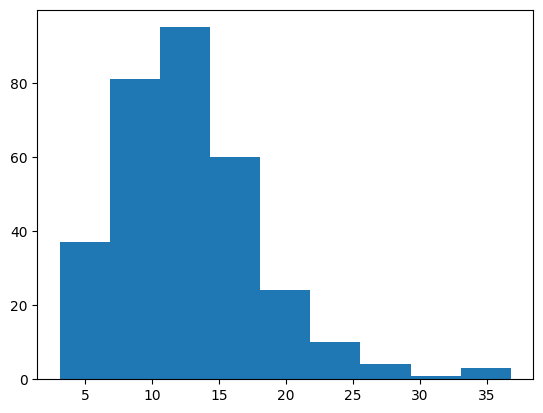

In [ ]:
count_in_bin, interval, patches = plt.hist(C_8, bins=num)

In [ ]:
count1 = []
count2 = []
count3 = []
count4 = []
middle = []
for i in range(num):
  count1.append(count_in_bin[i])
  middle.append((interval[i] + interval[i + 1]) / 2)
  print("Номер интервала {}, кол-во {}, интервал {}:{}".format(i + 1, int(count_in_bin[i]), interval[i], interval[i + 1]))

Номер интервала 1, кол-во 37, интервал 3.1:6.844444444444444
Номер интервала 2, кол-во 81, интервал 6.844444444444444:10.588888888888889
Номер интервала 3, кол-во 95, интервал 10.588888888888889:14.333333333333332
Номер интервала 4, кол-во 60, интервал 14.333333333333332:18.077777777777776
Номер интервала 5, кол-во 24, интервал 18.077777777777776:21.822222222222223
Номер интервала 6, кол-во 10, интервал 21.822222222222223:25.566666666666666
Номер интервала 7, кол-во 4, интервал 25.566666666666666:29.31111111111111
Номер интервала 8, кол-во 1, интервал 29.31111111111111:33.05555555555555
Номер интервала 9, кол-во 3, интервал 33.05555555555555:36.8


In [ ]:
sum_rel_frequency = 0
sum_frequency = 0
norm = st.norm(C_8.mean(), C_8.std())
expect_in_interval = []
for i in range(num):
  rel_frequency = count_in_bin[i] / n
  count2.append(rel_frequency)
  if i == 0:
    expect_in_interval.append(norm.cdf(interval[i + 1]))
  elif i == (num - 1):
    expect_in_interval.append(1 - norm.cdf(interval[i]))
  else:
    expect_in_interval.append(norm.cdf(interval[i + 1]) - norm.cdf(interval[i]))
  print("Номер интервала {}, частота {}, отн частота {}, истинная вер {}".format(i + 1, int(count_in_bin[i]), rel_frequency, expect_in_interval[i]))

Номер интервала 1, частота 37, отн частота 0.11746031746031746, истинная вер 0.13238652904591353
Номер интервала 2, частота 81, отн частота 0.2571428571428571, истинная вер 0.20753272477969775
Номер интервала 3, частота 95, отн частота 0.30158730158730157, истинная вер 0.2741012986175778
Номер интервала 4, частота 60, отн частота 0.19047619047619047, истинная вер 0.22545642414042477
Номер интервала 5, частота 24, отн частота 0.0761904761904762, истинная вер 0.11546706228302195
Номер интервала 6, частота 10, отн частота 0.031746031746031744, истинная вер 0.03679786871105717
Номер интервала 7, частота 4, отн частота 0.012698412698412698, истинная вер 0.007289841200113556
Номер интервала 8, частота 1, отн частота 0.0031746031746031746, истинная вер 0.0008965713657705932
Номер интервала 9, частота 3, отн частота 0.009523809523809525, истинная вер 7.167985642286823e-05


In [ ]:
np.array([expect_in_interval]).sum()

1.0

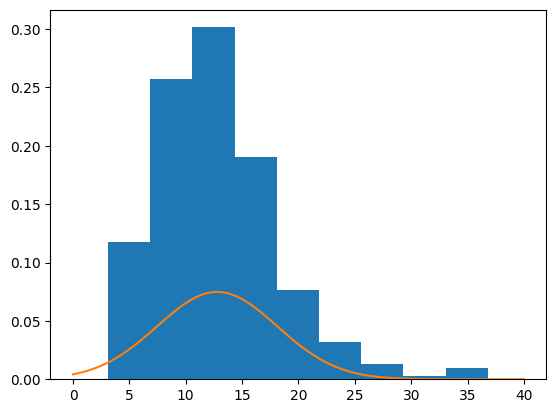

In [ ]:
x = np.linspace(0, 40, 100)
plt.hist(C_8, bins=num, weights = np.array([1] * n) / n)
plt.plot(x, st.norm(C_8.mean(), C_8.std()).pdf(x))
plt.show()

$Z = {\sum\limits_{i=1}^{k}}\frac{(n_i-np_i)^2}{np_i},$

${Z|_{H_0}}\space \sim {\chi^2(k - r - 1)},$

In [ ]:
count_in_bin

array([37., 81., 95., 60., 24., 10.,  4.,  1.,  3.])

In [ ]:
np.array(expect_in_interval) * n

array([4.17017566e+01, 6.53728083e+01, 8.63419091e+01, 7.10187736e+01,
       3.63721246e+01, 1.15913286e+01, 2.29629998e+00, 2.82419980e-01,
       2.25791548e-02])

In [ ]:
st.chisquare(count_in_bin, np.array(expect_in_interval) * n, ddof = 2)

Power_divergenceResult(statistic=406.9780370571591, pvalue=8.834103766114434e-85)

4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

$JB=n\left({\frac  {S^{2}}{6}}+{\frac  {(K)^{2}}{24}}\right)$

$JB \sim \chi^2(2)$

In [ ]:
st.jarque_bera(C_8)

SignificanceResult(statistic=146.32345934833677, pvalue=1.6836992405832223e-32)

5. Проверка однородности выборок

5.1 Критерий знаков

In [ ]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(C_11, C_12)

(124.5, 1.9114592806403368e-50)

In [ ]:
np.count_nonzero(C_11 > C_12)

282

5.2. Критерий хи-квадрат

In [ ]:
#Формула Стерджесса
num = int(1 + math.log2(n))
num

9

In [ ]:
num = 2 * num
num

18

In [ ]:
C_11.min(), C_11.max()

(214, 9642)

In [ ]:
C_12.min(), C_12.max()

(30, 6901)

In [ ]:
x = np.linspace(min(C_11.min(), C_12.min()), max(C_11.max(), C_12.max()), num + 1)
x

array([  30.,  564., 1098., 1632., 2166., 2700., 3234., 3768., 4302.,
       4836., 5370., 5904., 6438., 6972., 7506., 8040., 8574., 9108.,
       9642.])

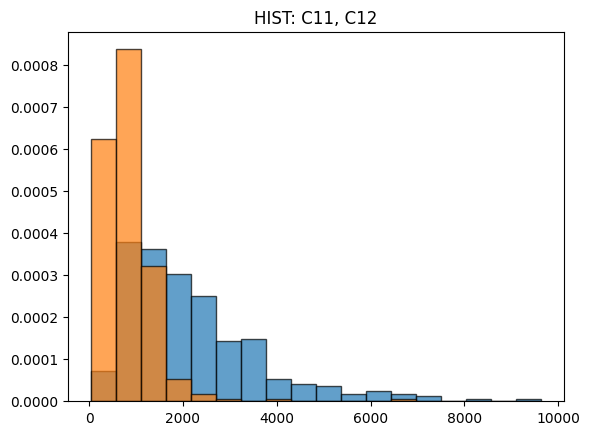

In [ ]:
plt.hist(C_11, bins=x, density=True, edgecolor='black', alpha = 0.7)
plt.hist(C_12, bins=x, density=True, edgecolor='black', alpha = 0.7)
plt.title("HIST: C11, C12")
plt.show()

In [ ]:
x

array([  30.,  564., 1098., 1632., 2166., 2700., 3234., 3768., 4302.,
       4836., 5370., 5904., 6438., 6972., 7506., 8040., 8574., 9108.,
       9642.])

In [ ]:
def two_sample_chi_square(bins, X, Y, ddof):
   # exp = [(f.cdf(space + delt) - f.cdf(space)) * len(X)]
    exp1 = [np.count_nonzero(X < bins[1])]
    exp2 = [np.count_nonzero(Y < bins[1])]
    for i in range(1, len(bins) - 2):
        exp1.append(np.count_nonzero((X >= bins[i]) & (X < bins[i + 1])))
        exp2.append(np.count_nonzero((Y >= bins[i]) & (Y < bins[i + 1])))
    exp1.append(np.count_nonzero(X >= bins[-2]))
    exp2.append(np.count_nonzero(Y >=  bins[-2]))
    Z = 0
    n_1 = len(X)
    n_2 = len(Y)
    # for i in range (len(bins) - 1):
    #    Z += 1 / (exp1[i] + exp2[i]) * (exp1[i] / n_1 - exp2[i] / n_2) ** 2
    # Z *= n_1
    # Z *= n_2
    return exp1, exp2, bins
    # return st.chisquare(obs, exp, ddof = ddof)

In [ ]:
count_in_bin1, count_in_bin2, interval = two_sample_chi_square(x, C_11, C_12, 2)
print(interval)
print(count_in_bin1)
print(sum(count_in_bin1), len(count_in_bin1))
print(count_in_bin2)
print(sum(count_in_bin2), len(count_in_bin2))
#print("\n")
#print("Z =", Z)
#p_value= 2 * min(st.chi2(10 - 1).cdf(Z), 1 - st.chi2(10 - 1).cdf(Z))
#print("p-value =", p_value)

[  30.  564. 1098. 1632. 2166. 2700. 3234. 3768. 4302. 4836. 5370. 5904.
 6438. 6972. 7506. 8040. 8574. 9108. 9642.]
[12, 64, 61, 51, 42, 24, 25, 9, 7, 6, 3, 4, 3, 2, 0, 1, 0, 1]
315 18
[105, 141, 54, 9, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
315 18


Объединим последние 7 бинов в один

In [ ]:
x

array([  30.,  564., 1098., 1632., 2166., 2700., 3234., 3768., 4302.,
       4836., 5370., 5904., 6438., 6972., 7506., 8040., 8574., 9108.,
       9642.])

In [ ]:
new_x = x[:12:]
new_x = np.append(new_x, max(C_11.max(), C_12.max()))
print(new_x)


[  30.  564. 1098. 1632. 2166. 2700. 3234. 3768. 4302. 4836. 5370. 5904.
 9642.]


In [ ]:
count_in_bin1, count_in_bin2, interval = two_sample_chi_square(new_x, C_11, C_12, 2)
print(interval)
print(count_in_bin1)
print(sum(count_in_bin1), len(count_in_bin1))
print(count_in_bin2)
print(sum(count_in_bin2), len(count_in_bin2))

[  30.  564. 1098. 1632. 2166. 2700. 3234. 3768. 4302. 4836. 5370. 5904.
 9642.]
[12, 64, 61, 51, 42, 24, 25, 9, 7, 6, 3, 11]
315 12
[105, 141, 54, 9, 3, 1, 0, 1, 0, 0, 0, 1]
315 12


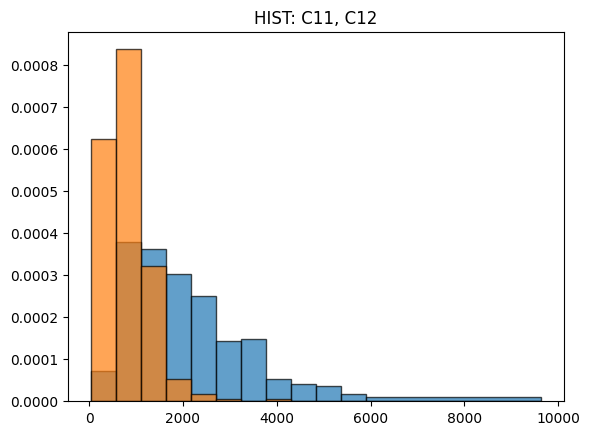

In [ ]:
plt.hist(C_11, bins=new_x, density=True, edgecolor='black', alpha = 0.7)
plt.hist(C_12, bins=new_x, density=True, edgecolor='black', alpha = 0.7)
plt.title("HIST: C11, C12")
plt.show()

In [ ]:
interval[1] - interval[0]

534.0

In [ ]:
for i in range(len(new_x) - 1):
  print("Номер интервала {}, интервал {}:{}".format(i + 1, interval[i], interval[i + 1]))

Номер интервала 1, интервал 30.0:564.0
Номер интервала 2, интервал 564.0:1098.0
Номер интервала 3, интервал 1098.0:1632.0
Номер интервала 4, интервал 1632.0:2166.0
Номер интервала 5, интервал 2166.0:2700.0
Номер интервала 6, интервал 2700.0:3234.0
Номер интервала 7, интервал 3234.0:3768.0
Номер интервала 8, интервал 3768.0:4302.0
Номер интервала 9, интервал 4302.0:4836.0
Номер интервала 10, интервал 4836.0:5370.0
Номер интервала 11, интервал 5370.0:5904.0
Номер интервала 12, интервал 5904.0:9642.0


In [ ]:
for i in range(len(new_x) - 1):
  print("Номер интервала {}, частота1 {}, частота2 {}, отн частота1 {},  отн частота2 {}".format(i + 1, count_in_bin1[i], count_in_bin2[i], count_in_bin1[i] / n, count_in_bin2[i] / n))

Номер интервала 1, частота1 12, частота2 105, отн частота1 0.0380952380952381,  отн частота2 0.3333333333333333
Номер интервала 2, частота1 64, частота2 141, отн частота1 0.20317460317460317,  отн частота2 0.44761904761904764
Номер интервала 3, частота1 61, частота2 54, отн частота1 0.19365079365079366,  отн частота2 0.17142857142857143
Номер интервала 4, частота1 51, частота2 9, отн частота1 0.1619047619047619,  отн частота2 0.02857142857142857
Номер интервала 5, частота1 42, частота2 3, отн частота1 0.13333333333333333,  отн частота2 0.009523809523809525
Номер интервала 6, частота1 24, частота2 1, отн частота1 0.0761904761904762,  отн частота2 0.0031746031746031746
Номер интервала 7, частота1 25, частота2 0, отн частота1 0.07936507936507936,  отн частота2 0.0
Номер интервала 8, частота1 9, частота2 1, отн частота1 0.02857142857142857,  отн частота2 0.0031746031746031746
Номер интервала 9, частота1 7, частота2 0, отн частота1 0.022222222222222223,  отн частота2 0.0
Номер интервала 10,

In [ ]:
for i in range(len(new_x) - 1):
  print(round(count_in_bin2[i] / n, 3))

0.333
0.448
0.171
0.029
0.01
0.003
0.0
0.003
0.0
0.0
0.0
0.003


In [ ]:
st.chi2_contingency([count_in_bin1, count_in_bin2])

Chi2ContingencyResult(statistic=243.36444843244416, pvalue=6.838681808226947e-46, dof=11, expected_freq=array([[ 58.5, 102.5,  57.5,  30. ,  22.5,  12.5,  12.5,   5. ,   3.5,
          3. ,   1.5,   6. ],
       [ 58.5, 102.5,  57.5,  30. ,  22.5,  12.5,  12.5,   5. ,   3.5,
          3. ,   1.5,   6. ]]))

6. Таблицы сопряжённости

In [ ]:
C_2 = df.C2
C_5 = df.C5

In [ ]:
C_2


0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
310    Female
311    Female
312    Female
313    Female
314    Female
Name: C2, Length: 315, dtype: object

In [ ]:
C_2_val = {}
len(C_2)

315

In [ ]:
C_2

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
310    Female
311    Female
312    Female
313    Female
314    Female
Name: C2, Length: 315, dtype: object

In [ ]:
C_2_val = C_2.groupby(C_2).count().to_dict()
C_2_val

{'Female': 273, 'Male': 42}

In [ ]:
C_5_val = C_5.groupby(C_5).count().to_dict()
C_5_val

{'No': 111, 'Not often': 82, 'Often': 122}

In [ ]:
C_2_5 = df[['C2', 'C5']]
C_2_5

,C2,C5
0,Female,Often
1,Female,Often
2,Female,Not often
3,Female,No
4,Female,Often
...,...,...
310,Female,No
311,Female,Often
312,Female,Often
313,Female,Often


In [ ]:
empirical_table = pd.crosstab(C_2, C_5)
empirical_table.values

array([[ 87,  77, 109],
       [ 24,   5,  13]])

In [ ]:
theor_table = np.zeros((2 , 3))
for i in range(2):
    for j in range(3):
        s1 = empirical_table.iloc[i].sum()
        s2 = empirical_table.iloc[:, j].sum()
        theor_table[i][j] = (s1 * s2) / len(C_2)
theor_table

array([[ 96.2       ,  71.06666667, 105.73333333],
       [ 14.8       ,  10.93333333,  16.26666667]])

In [ ]:
st.chi2_contingency(empirical_table)

Chi2ContingencyResult(statistic=11.070979092770376, pvalue=0.003944277256603155, dof=2, expected_freq=array([[ 96.2       ,  71.06666667, 105.73333333],
       [ 14.8       ,  10.93333333,  16.26666667]]))

7. Дисперсионный анализ

In [ ]:
C_3 = df.C3
C_14 = df.C14

In [ ]:
C_3_val = C_3.groupby(C_3).count().to_dict()
C_3_val

{'Current Smoker': 43, 'Former': 115, 'Never': 157}

In [ ]:
list(C_3_val.keys())[0]

'Current Smoker'

In [ ]:
C_3_14 = df[['C3', 'C14']]
C_3_14

,C3,C14
0,Former,915
1,Never,727
2,Former,721
3,Former,615
4,Never,799
...,...,...
310,Former,216
311,Never,328
312,Never,502
313,Former,684


In [ ]:
table = C_3_14.groupby(C_3).agg({'C14': ['count','mean', 'var']})
table

C14                          
               count        mean           var
C3                                            
Current Smoker    43  563.069767  42674.399779
Former           115  644.243478  53438.466514
Never            157  583.305732  35209.931569

In [ ]:
C_14.mean(), table.iloc[0][1], table.iloc[1][0]

(602.7904761904762, 563.0697674418604, 115.0)

In [ ]:
table.iloc[1][0] * (table.iloc[1][1] - C_14.mean()) ** 2

197610.40877452437

In [ ]:
groupped = [C_14[C_3 == c].values for c in list(C_3_val.keys())]
groupped

[array([ 624,  179,  665,  611,  388,  384,  317,  531,  624,  677,  592,
         360,  549,  539,  421,  449,  927,  516,  429,  485,  566,  378,
         419,  569,  670,  602,  573,  777,  481,  296,  388,  418,  486,
         791,  516,  403,  560,  366, 1102, 1193,  796,  669,  926]),
 array([ 915,  721,  615,  654,  562,  935, 1249, 1035, 1262, 1727,  684,
         537,  809,  822,  901,  818,  623, 1002,  564,  456,  838,  574,
         321,  783,  692,  730,  587,  831,  560,  393,  810,  525,  542,
         558,  504,  783,  435,  362,  619,  426,  592,  799,  497,  622,
         522,  551,  797,  532,  422,  527,  512,  464,  523,  953,  917,
         404,  466,  558,  476,  733,  659,  617,  520,  474,  643,  627,
         428,  434,  413,  849,  727,  700,  499,  853,  532,  396,  620,
         443,  489, 1443,  470,  566,  556,  394,  323,  734,  709,  561,
         506,  817,  498,  436,  291,  293,  636,  584,  880,  770,  537,
         466,  759,  823,  746,  368,  800

In [ ]:
st.bartlett(*groupped)

BartlettResult(statistic=5.7821551516644965, pvalue=0.05551635728304457)

In [ ]:
D_b = 0
D_w = 0
for i in range(3):
  D_b += table.iloc[i][0] * (table.iloc[i][1] - C_14.mean()) ** 2
  D_w += table.iloc[i][0] * table.iloc[i][2]
D_b /= len(C_14)
D_w /= len(C_14)
D_b, D_w

(1031.932931052181, 42883.752685743675)

In [ ]:
k = 3
n = len(C_14)

In [ ]:
#Межгрупповая дисперсия - Группировочный признак
deg_free_mgr = k - 1
d_mgr_unbiased = n * D_b / deg_free_mgr
print("Межгрупповая дисперсия:", "Межгрупповая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(D_b, deg_free_mgr, d_mgr_unbiased))

Межгрупповая дисперсия: Межгрупповая дисперсия = 1031.932931052181, Число степеней свободы = 2, Несмещённая оценка = 162529.4366407185


In [ ]:
#Внутригрупповая дисперсия - Группировочный признак
deg_free_ingr = n - k
d_ingr_unbiased = n * D_w / deg_free_ingr
print("Внутригрупповая дисперсия:", "Внутригрупповая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(D_w, deg_free_ingr, d_ingr_unbiased))

Внутригрупповая дисперсия: Внутригрупповая дисперсия = 42883.752685743675, Число степеней свободы = 312, Несмещённая оценка = 43296.09646156814


In [ ]:
#Общая дисперсия - Группировочный признак
deg_free = n - 1
d_unbiased = n * C_14.var() / deg_free_ingr
print("Общая дисперсия:", "Общая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(C_14.var(), deg_free, d_unbiased))

Общая дисперсия: Общая дисперсия = 43637.31901728845, Число степеней свободы = 314, Несмещённая оценка = 44056.90862322391


In [ ]:
D_b / D_w

0.024063494130616

In [ ]:
(D_b / D_w) ** 0.5

0.15512412491490807

In [ ]:
st.f_oneway(*groupped)

F_onewayResult(statistic=3.790757228603147, pvalue=0.02362540112051114)

8. Корреляционный анализ

In [ ]:
st.pearsonr(C_11, C_12)

PearsonRResult(statistic=0.052866903502100424, pvalue=0.3496757486979532)

In [ ]:
st.spearmanr(C_11, C_12)

SignificanceResult(statistic=0.1962857839707222, pvalue=0.0004582828568191489)

In [ ]:
st.kendalltau(C_11, C_12)

SignificanceResult(statistic=0.1328626107882256, pvalue=0.0004387531397532802)

In [ ]:
st_per, rest = st.pearsonr(C_11, C_12)
alpha = [0.01, 0.05, 0.1]
for al in alpha:
  middle = st_per + st_per * (1 - st_per ** 2) / (2 * n)
  diff = st.norm(0, 1).ppf(1 - al / 2) * (1 - st_per ** 2) / n ** 0.5
  print(str(al) + ": {} - {}".format(middle - diff, middle + diff))

0.01: -0.09177532548783002 - 0.19767649485803723
0.05: -0.05717222942292522 - 0.16307339879313246
0.1: -0.03946739422903508 - 0.1453685635992423


In [ ]:
st_per, rest = st.pearsonr(C_11, C_12)
st_sp, rest = st.spearmanr(C_11, C_12)
st_ken, rest = st.kendalltau(C_11, C_12)
z_pearson = st_per * ((n - 2) ** 0.5) / ((1 - st_per ** 2) ** 0.5)
z_spirman = st_sp * ((n - 2) ** 0.5) / ((1 - st_sp ** 2) ** 0.5)
z_kendall = st_ken * ((9 * n * (n - 1)) / (2 * (2 * n + 5))) ** 0.5

z_pearson, z_spirman, z_kendall

(0.9366208022814079, 3.541544634764964, 3.5175661825110005)

8.2. Расчёт множественных коэффициентов корреляции

In [ ]:
C_8 = df.C8
C_10 = df.C10
C_13 = df.C13

In [ ]:
df[['C8' , 'C10' , 'C13']].corr(method = 'kendall')

,C8,C10,C13
C8,1.000000,0.148631,0.128215
C10,0.148631,1.000000,-0.092647
C13,0.128215,-0.092647,1.000000


In [ ]:
st.kendalltau(C_8, C_10)[1]

8.737266513108192e-05

In [ ]:
st.kendalltau(C_8, C_13)[1]

0.0007265007258609368

In [ ]:
st.kendalltau(C_10, C_13)[1]

0.014336459244298085

In [ ]:
ranks = np.array([C_8.rank(), C_10.rank(), C_13.rank()])
k = 3
W = 0
for i in range(n):
  sum1 = 0
  for j in range(k):
    sum1 += ranks[j][i]
  sum1 = (sum1 - k * (n + 1) / 2) ** 2
  W += sum1
W *= (12 / (k ** 2 * (n ** 3 - n)))
W

0.3937182376511571

In [ ]:
st_W = n * (k - 1) * W
p_value = 1 - st.chi2(n - 1).ppf(st_W)
st_W, p_value

(248.04248972022899, nan)

9. Регрессионный анализ

In [ ]:
C_6 = df.C6
С_14 = df.C14
cor_per, rest = st.pearsonr(C_6, C_14)
b0 = C_14.mean() - cor_per * C_14.std() / C_6.std() * C_6.mean()
b1 = cor_per * C_14.std() / C_6.std()
b0, b1

(643.2421313446065, -0.02251498706688208)

In [ ]:
C_14.mean()

602.7904761904762

In [ ]:
k = 2
fact_v = 1 / n * sum(((C_6 * b1 + b0) - C_14.mean()) ** 2)
fact_v, k - 1, n * (k - 1) * fact_v

(233.89664981980155, 1, 73677.44469323748)

In [ ]:
rest_v = 1 / n * sum((C_14 - (C_6 * b1 + b0)) ** 2)
rest_v, n - k, n / (n - k) * rest_v

(43264.891195985176, 313, 43541.344174873266)

In [ ]:
C_14.var(), n - 1, n / (n - 1) * C_14.var()

(43637.31901728845, 314, 43776.291370846695)

In [ ]:
43264.891195985176+233.89664981980155

43498.787845804974

plt.scatter(C_6, C_14)
x = np.linspace(0, 8000, 70000)
y = x * b1 + b0
plt.plot(x, y, c = 'red')
plt.show()

In [ ]:
fact_v / C_14.var(), (fact_v / C_14.var()) ** 0.5

(0.005360014205435838, 0.07321211788656191)

9.1.2. Интервальные оценки линейной регрессионной модели

In [ ]:
interval = st.t(n - 2).ppf(1 - alpha/2) * (n / (n - k) * rest_v) ** 0.5 * (sum([x ** 2 for x in C_6]) / (n ** 2 * C_6.var())) ** 0.5

TypeError: ignored

In [ ]:
alpha = [0.01, 0.05, 0.1]
print("b0:")
for al in alpha:
  diff =  st.t(n - 2).ppf(1 - al / 2) * (n / (n - k) * rest_v) ** 0.5 * ((sum([x ** 2 for x in C_6])) / (n ** 2 * C_6.var())) ** 0.5
  print(str(al) + ": {} - {}".format(b0 - diff, b0 + diff))

In [ ]:
alpha = [0.01, 0.05, 0.1]
print("b1:")
for al in alpha:
  diff =  st.t(n - 2).ppf(1 - al / 2) * (n / (n - k) * rest_v) ** 0.5 * (1 / (n * C_6.var())) ** 0.5
  print(str(al) + ": {} - {}".format(b0 - diff, b0 + diff))

In [ ]:
sns.regplot(x = C_6 , y = C_14 , ci = 90)

In [ ]:
C_6_14 = df[['C6', 'C14']]
C_6_14.iloc[0][0]

In [ ]:
C_6_14

In [ ]:
plt.scatter(C_6, [C_6_14.iloc[i][1] - (b0 + b1 * C_6_14.iloc[i][0]) for i in range(n)])
plt.xlabel("$C6$")
plt.ylabel("$C14$")
plt.show()

In [ ]:
statistics = (n - 2) * fact_v / rest_v
p_value = 1 - st.f(1, n - 2).cdf(statistics)
statistics, p_value

9.2 Линейная регрессионная модель общего вида

In [ ]:
F = np.array([[1, x, x ** 2] for x in C_6])
b = np.linalg.inv(F.transpose().dot(F)).dot(F.transpose()).dot(np.array(C_14))
print(b)

In [ ]:
k = 3
fact_v = 1 / n * sum(((C_6 ** 2 * b[2] + C_6 * b[1] + b[0]) - C_14.mean()) ** 2)
fact_v, k - 1, n * (k - 1) * fact_v

In [ ]:
rest_v = 1 / n * sum((C_14 - (C_6 ** 2 * b[2] + C_6 * b[1] + b[0])) ** 2)
rest_v, n - k, n / (n - k) * rest_v

In [ ]:
C_14.var(), n - 1, n / (n - 1) * C_14.var()

In [ ]:
43097.09073166146 + 401.6971141435241

In [ ]:
fact_v / C_14.var(), (fact_v / C_14.var()) ** 0.5

In [ ]:
plt.scatter(C_6, C_14)
x_copy = sorted(list(x))
x_min = min(x)
x_max = max(x)
x = np.linspace(C_6.min(), C_6.max(), 100)
plt.plot(x, [(b[0] + b[1] * x1 + b[2] * x1 ** 2) for x1 in x], c = 'r')
plt.xlabel("$C6$")
plt.ylabel("$C14$")
plt.show()

In [ ]:
plt.scatter(C_6, [C_6_14.iloc[i][1] - (b[0] + b[1] * C_6_14.iloc[i][0] + b[2] * (C_6_14.iloc[i][0] ** 2)) for i in range(n)])
plt.xlabel("$C6$")
plt.ylabel("$C14$")
plt.show()

In [ ]:
statistics = (fact_v / C_14.var()) * (n - k) / (1 - (fact_v / C_14.var())) / (k - 1)
p_value = 1 - st.f(k - 1, n - k).cdf(statistics)
statistics, p_value

9.3 Множественная линейная регрессионная модель

In [ ]:
C_6_12 = df[['C6', 'C12']]
C_6_12.iloc[0][0]

In [ ]:
F = np.array([[1, C_6_12.iloc[i][0], C_6_12.iloc[i][1]] for i in range(n)])
b = np.linalg.inv(F.transpose().dot(F)).dot(F.transpose()).dot(np.array(C_14))
print(b)

In [ ]:
k = 3
fact_v = 1 / n * sum([((C_6_12.iloc[i][1] * b[2] + C_6_12.iloc[i][0] * b[1] + b[0]) - C_14.mean()) ** 2 for i in range(n)])
fact_v, k - 1, n * (k - 1) * fact_v

In [ ]:
rest_v = 1 / n * sum([(C_14[i] - (C_6_12.iloc[i][1] * b[2] + C_6_12.iloc[i][0] * b[1] + b[0])) ** 2 for i in range(n)])
rest_v, n - k, n / (n - k) * rest_v

In [ ]:
C_14.var(), n - 1, n / (n - 1) * C_14.var()

In [ ]:
291.4154168339831+43207.37242897104

In [ ]:
fact_v / C_14.var(), (fact_v / C_14.var()) ** 0.5